## Task 3: Kalman Filtering

In [2]:
import numpy as np

In [3]:
# load data from csv files
# original data
x_original = np.loadtxt('x.csv', delimiter=',')
y_original = np.loadtxt('y.csv', delimiter=',')

# noisy measurements
noisy_a = np.loadtxt('na.csv', delimiter=',')
noisy_b = np.loadtxt('nb.csv', delimiter=',')

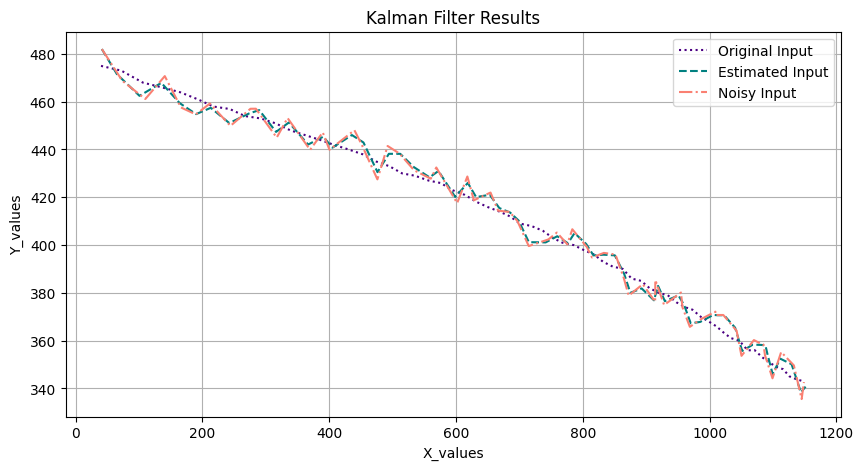

In [16]:
import numpy as np
import matplotlib.pyplot as plt

delta_t = 0.5
# F Matrix
const_velo_model = np.array([[1, 0, delta_t, 0], [0, 1, 0, delta_t], [0, 0, 1, 0], [0, 0, 0, 1]])
# H Matrix
cart_obs_model = np.array([[1, 0, 0, 0], [0, 1, 0, 0]])
# Q matrix
covar1 = np.array([[0.16, 0, 0, 0], [0, 0.36, 0, 0], [0, 0, 0.16, 0], [0, 0, 0, 0.36]])
# R matrix
covar2 = np.array([[0.25, 0], [0, 0.25]])
x = np.array([noisy_a[0], noisy_b[0], 0, 0])
P = np.eye(4)

x_est = []
y_est = []

for i in range(len(noisy_a)):
    x = np.dot(const_velo_model, x)
    P = np.dot(np.dot(const_velo_model, P), const_velo_model.T) + covar1
    
    z = np.array([noisy_a[i], noisy_b[i]])
    y = z - np.dot(cart_obs_model, x)
    S = np.dot(np.dot(cart_obs_model, P), cart_obs_model.T) + covar2
    K = np.dot(np.dot(P, cart_obs_model.T), np.linalg.inv(S))
    x = x + np.dot(K, y)
    P = np.dot((np.eye(4) - np.dot(K, cart_obs_model)), P)
    
    x_est.append(x[0])
    y_est.append(x[1])
    
plt.figure(figsize=(10, 5))
plt.plot(x_original, y_original, label='Original Input', color='indigo', linestyle=':')
plt.plot(x_est, y_est, label='Estimated Input', color='teal', linestyle='--')
plt.plot(noisy_a, noisy_b, label='Noisy Input', color='salmon', linestyle='-.')
plt.xlabel('X_values')
plt.ylabel('Y_values')
plt.title('Kalman Filter Results')
plt.legend()
plt.grid(True)
plt.show()


## Root Mean Squared Error

$$RMSE = \sqrt{\frac{\sum_{i=1}^{n}(x_{\text{estimated}} - x_{\text{original}})^2}{n}}$$

In [4]:
# Calculate RMSE
def calculate_rmse(original, estimated):
    n = len(original)
    squared_errors = [(original[i] - estimated[i])**2 for i in range(n)]
    mean_squared_error = sum(squared_errors) / n
    rmse = np.sqrt(mean_squared_error)
    return rmse

# RMSE for estimated x and y coordinates
rmse_x_est = calculate_rmse(x_original, x_est)
rmse_y_est = calculate_rmse(y_original, y_est)


print("RMSE for filtered x coordinate:", rmse_x_est)
print("RMSE for filtered y coordinate:", rmse_y_est)


RMSE for filtered x coordinate: 4.146163941705792
RMSE for filtered y coordinate: 4.101219391449165


In [5]:
# RMSE for noisy x and y coordinates
rmse_x_noisy = calculate_rmse(x_original, noisy_a)
rmse_y_noisy = calculate_rmse(y_original, noisy_b)

print("RMSE for noisy x coordinate:", rmse_x_noisy)
print("RMSE for noisy y coordinate:", rmse_y_noisy)

RMSE for noisy x coordinate: 5.381839381867705
RMSE for noisy y coordinate: 5.101956220933059


RMSE has decreased for the estimated values as compared to the measured noisy values. This is because the Kalman filter is able to predict the true values of the states by taking into account the noise in the measurements.